In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltp import Preprocessor

In [4]:
df = pd.read_csv('fraud_email_.csv')
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [5]:
df.rename(columns={'Text':'Emails'}, inplace=True)

In [6]:
df.isnull().sum()

Emails    1
Class     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['Class'].value_counts()

0    6742
1    5186
Name: Class, dtype: int64

In [9]:
df.shape

(11928, 2)

C:\Users\anubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


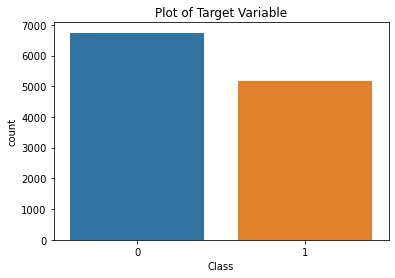

In [10]:
sns.countplot(df['Class'])
plt.title("Plot of Target Variable")
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [12]:
pre = Preprocessor(df['Emails']).text_cleaner()

Cleaning Complete
Time Taken: 9.823 seconds


In [13]:
pre[2]

'dear friend greeting wish accost request would immense benefit u executor will possible may tempted make fortune client situation cannot help left better option issue presenting case client willed fortune next kin unfortunate next kin died day st october egyptian airline passenger board confirm website published bbc world news website http ew bbc co uk hi world america stm faced confusion pas fortune according english law fortune supposed bequeathed government nobody come forward next kin within seven year demise benefactor purpose contacting seek acting beneficiary lay claim legacy million deceased client bequeathed next kin alone know client great confidence everything left share would would want give huge part share tsunami victim primary objective amend add codicil make beneficiary million legacy feel may apprehensive consider amount big defend matter document back legacy passed next kin sure getting consent issue prefer divulge full identity risk disbarred english bar considers b

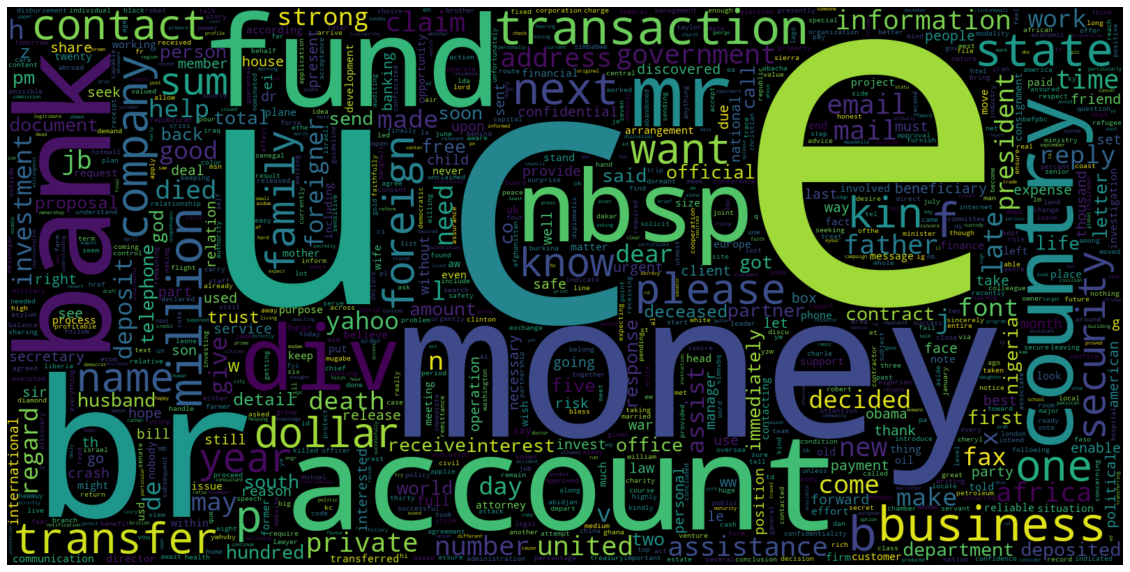

In [14]:
words = pre
plt.figure(figsize = (20,20))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
X = pre
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'Spliting Completed')
print(f'X Train: {len(X_train)} X Test: {len(X_test)} y Train: {len(y_train)} y Test: {len(y_test)}')

Spliting Completed
X Train: 9542 X Test: 2386 y Train: 9542 y Test: 2386


In [17]:
def fit_predict(model):   
    clf = Pipeline([('tfidf',TfidfVectorizer()),
                   ('clf',model)])


    clf.fit(X_train, y_train)
    print(f'Fitting Model Completed.')
    
    
    Score = clf.score(X_test,y_test)
    print(f'Accuracy: {Score*100}') 
    
    return clf


In [18]:
class Metrics():
    
    def __init__(self, pred):
        self.pred = pred
        
    def cm(self):
        cm = confusion_matrix(y_test, self.pred)
        labels = ['Not Spam','Spam']

        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm,annot =True, linewidth=.6, linecolor="r", fmt=".0f", ax = ax)

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
        plt.show()

    def report(self):
        class_report = classification_report(y_test, self.pred)
        print(class_report)

In [19]:
LR_model = fit_predict(LogisticRegression())

LR_pred = LR_model.predict(X_test)

Fitting Model Completed.
Accuracy: 98.61693210393965


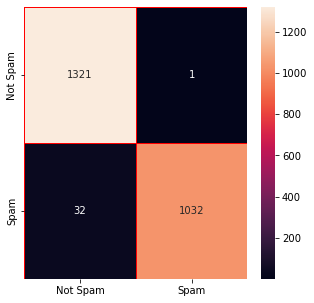

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1322
           1       1.00      0.97      0.98      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.98      0.99      2386
weighted avg       0.99      0.99      0.99      2386



In [20]:
Metrics(LR_pred).cm()

Metrics(LR_pred).report()

In [21]:
SVC_model = fit_predict(LinearSVC())

SVC_pred = SVC_model.predict(X_test)

Fitting Model Completed.
Accuracy: 99.53897736797988


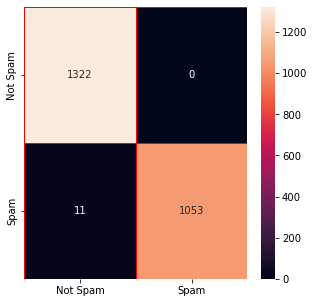

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1322
           1       1.00      0.99      0.99      1064

    accuracy                           1.00      2386
   macro avg       1.00      0.99      1.00      2386
weighted avg       1.00      1.00      1.00      2386



In [22]:
Metrics(SVC_pred).cm()

Metrics(SVC_pred).report()

In [23]:
NB_model = fit_predict(BernoulliNB())

NB_pred = NB_model.predict(X_test)

Fitting Model Completed.
Accuracy: 92.20452640402347


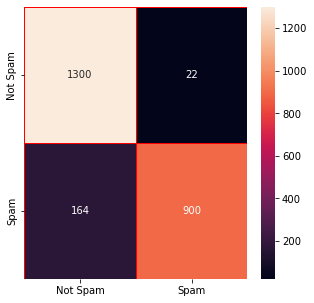

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1322
           1       0.98      0.85      0.91      1064

    accuracy                           0.92      2386
   macro avg       0.93      0.91      0.92      2386
weighted avg       0.93      0.92      0.92      2386



In [24]:
Metrics(NB_pred).cm()

Metrics(NB_pred).report()

In [25]:
import joblib

filename = 'model.joblib'
joblib.dump(LR_model,open(filename,'wb'))

In [26]:
with open('model.joblib','rb') as f:
    model = joblib.load(f)

In [27]:
model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])